## **Ciência de Dados para Finanças** <p>
**por: @Odemir Depieri Jr** - [Linkedin](https://www.linkedin.com/in/odemir-depieri-jr/) <p>
**por: @Ronisson Lucas Calmon da Conceição** - [Linkedin](https://www.linkedin.com/in/ronisson-lucas-calmon-da-concei%C3%A7%C3%A3o-7aa884202/) <p>
[Página do Curso](https://)

## **Site para nossa raspagem de dados**
http://www.ssp.sp.gov.br/Estatistica/ViolenciaMulher.aspx

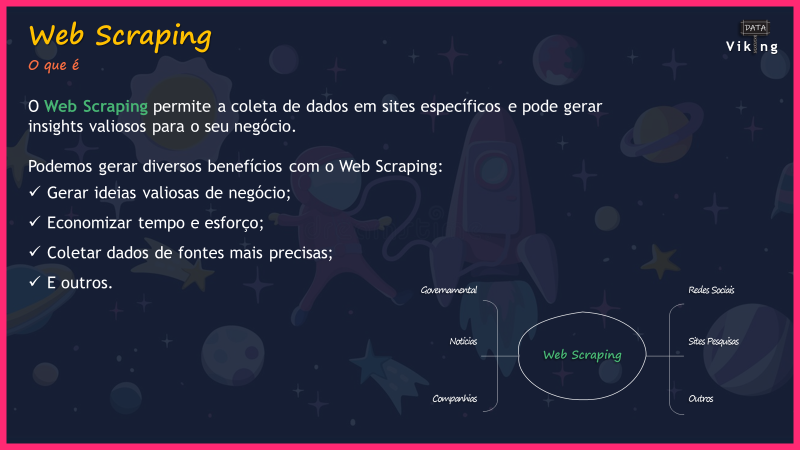

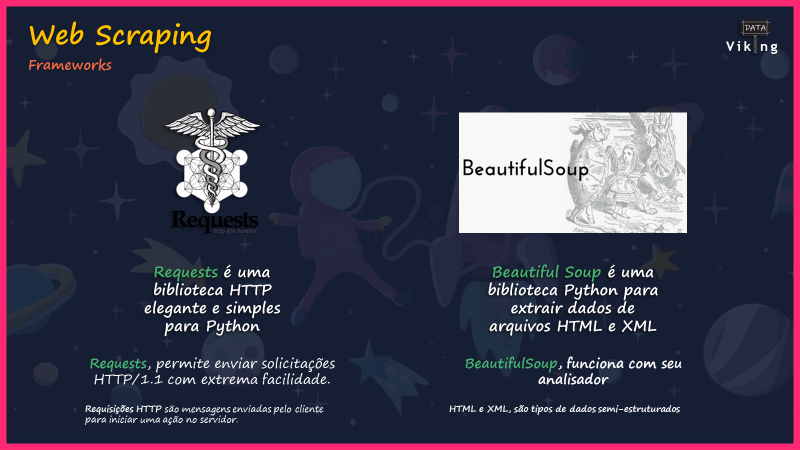

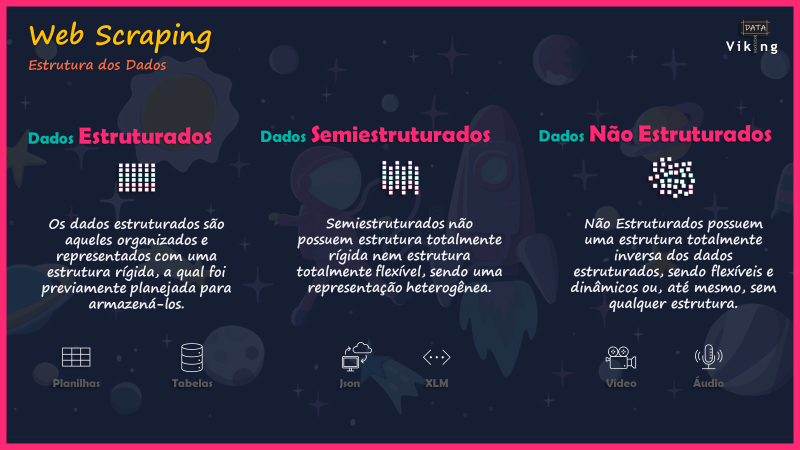

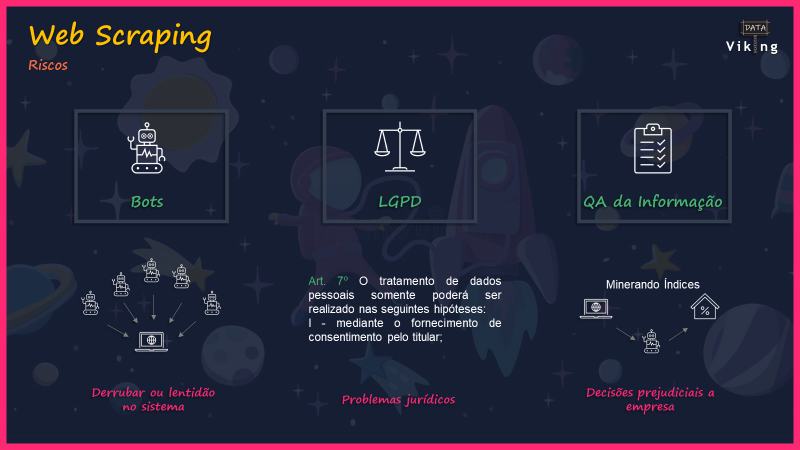

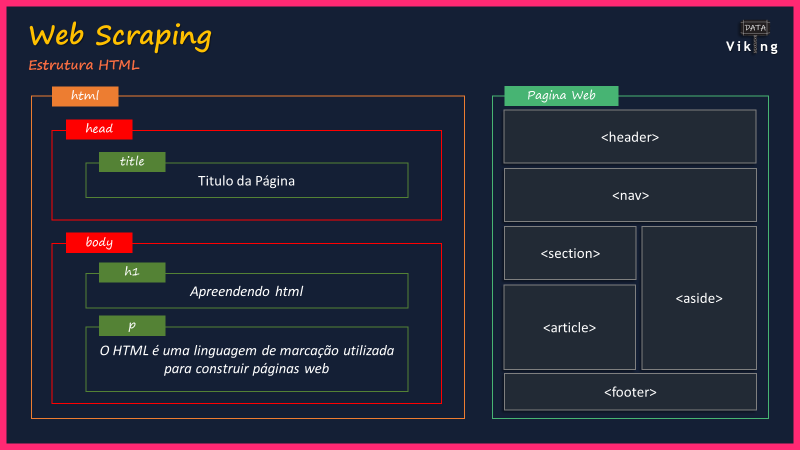

In [ ]:
# Importar os pacotes

# lib para http
import requests

# Lib para minerar os dados da pagina
from bs4 import BeautifulSoup

# Lib para modelagem de dados
import pandas as pd

# Lib para análise gráfica
import plotly.graph_objects as Dash

In [ ]:
# Carregar a pagina

# URL para buscar os dados
Site = 'http://www.ssp.sp.gov.br/Estatistica/ViolenciaMulher.aspx'

# Carregar os dados da pagina
Pagina = requests.get( Site )

In [ ]:
# 200 - ok
Pagina

<Response [200]>

In [ ]:
# Verificando tipo
type( Pagina )

requests.models.Response

In [ ]:
# BS4 vai intrepretar o arquivo html
Coleta = BeautifulSoup(Pagina.text, 'html.parser')

In [ ]:
# Tipo
type( Coleta )

bs4.BeautifulSoup

In [ ]:
# Coletando o titulo da pagina
Coleta.title

<title>
	SSP
</title>

In [ ]:
# Localizando as tabelas pela classe
Tabelas = Coleta.find_all('table', attrs={'class' : 'table table-striped table-hover table-condensed'} )

# Vericando
print(f'Foi localizado { len(Tabelas) } tabelas')

Foi localizado 130 tabelas


In [ ]:
# Exemplo para buscar
Tabelas[0].find_all('tr')[2].find_all('td')[4].find_all('span')[0].text

'11'

In [ ]:
# Função para as datas
import datetime
from dateutil.relativedelta import relativedelta

# Variaveis
Rotulos = []
Dados = []
Periodo = []

# Registro inicial do site
Registro_inicial = datetime.datetime( 2022, 6, 1)

# Loop nas tabelas
for Posicao, Consulta in enumerate(Tabelas):

  # Linha da tabela
  Linha = Consulta.find_all('tr')[2]

  # Celulas
  Rotulo = Linha.find_all('td')[4]

  # Nomeclatura do Feminicidio
  Label = Linha.find_all('td')[0].text

  # Informação
  Informacao = Rotulo.find_all('span')[0].text

  # Calculando a Data
  Data = Registro_inicial - relativedelta( months=Posicao )

  # Validando a condição
  if Label == 'FEMINICÍDIO':

    # Salvando a informação
    Dados.append( Informacao )
    Rotulos.append( Label )
    Periodo.append( Data )

  else:
    pass

  #print( Posicao, Label )

# Organizando os dados
Dicionario = {
    'Indicador' : Rotulos,
    'Valores' : Dados,
    'Periodo' : Periodo
}

# Criar a tabela
Tabela_Web = pd.DataFrame( Dicionario )

# Verificar
Tabela_Web.head(10)

,Indicador,Valores,Periodo
0,FEMINICÍDIO,11,2022-06-01
1,FEMINICÍDIO,12,2022-05-01
2,FEMINICÍDIO,10,2022-04-01
3,FEMINICÍDIO,19,2022-03-01
4,FEMINICÍDIO,11,2022-02-01
5,FEMINICÍDIO,12,2022-01-01
6,FEMINICÍDIO,10,2021-12-01
7,FEMINICÍDIO,9,2021-11-01
8,FEMINICÍDIO,9,2021-10-01
9,FEMINICÍDIO,6,2021-09-01


In [ ]:
# Verificando ultimos registros
Tabela_Web.tail()

,Indicador,Valores,Periodo
49,FEMINICÍDIO,16,2018-05-01
50,FEMINICÍDIO,14,2018-04-01
51,FEMINICÍDIO,8,2018-03-01
52,FEMINICÍDIO,8,2018-02-01
53,FEMINICÍDIO,5,2018-01-01


In [ ]:
# Setar o index
Tabela_Web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Indicador  54 non-null     object        
 1   Valores    54 non-null     object        
 2   Periodo    54 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 1.4+ KB


In [ ]:
# Converter par numerco
Tabela_Web['Valores'] = pd.to_numeric( Tabela_Web['Valores'] )

# Setando o index
Tabela_Web.set_index('Periodo', inplace=True )

# VErificando
Tabela_Web.head()

,Indicador,Valores
Periodo,,
2022-06-01,FEMINICÍDIO,11
2022-05-01,FEMINICÍDIO,12
2022-04-01,FEMINICÍDIO,10
2022-03-01,FEMINICÍDIO,19
2022-02-01,FEMINICÍDIO,11


In [ ]:
# Grafico
Figura = Dash.Figure()

Figura.add_trace(
    Dash.Scatter(
        x=Tabela_Web.index,
        y=Tabela_Web.Valores,
        mode='lines',
        name='Quantidade',
        marker_color='#FF7F0E'
    )
)

Figura.update_layout(
    title='histórico de Feminicídio - Estado de São Paulo',
    titlefont_size=20
)

Figura.show()